# Исследование успешности игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Проверить гипотезы:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
2.  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

**Ход исследования**

Исследование пройдет в шесть этапов:
1. Обзор данных;
2. Предобработка данных;
3. Анализ данных;
4. Составление портрета пользователя каждого региона;
5. Проверка гипотез;
6. Общий вывод.

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Читаем файл `games.csv`. Он сохранен в той же папке, что и проект. Сохраняем его в переменную `data`.

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов.
Согласно документации к данным:
* `Name` — название игры 
* `Platform` — платформа 
* `Year_of_Release` — год выпуска 
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий) 
* `Other_sales` — продажи в других странах (миллионы проданных копий) 
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В данных замечены следующие ошибки: 
1. Нарушение стиля в названиях колонок;
2. Пропуски;
3. Неправильный тип данных в столбцах `Year_of_Release` и `User_Score`.

## Шаг 2. Предобработка данных

### 2.1 Стиль заголовков 

In [5]:
data.columns #выводим названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименуем колонки в соответвие со 'змеиным регистром':

In [6]:
data.columns = data.columns.str.lower()

### 2.2 Пропуски


В столбце с оценкой пользователей используется аббревиатура 'tbd'. В сфере компьютерных игр, 'To Be Determined' - 'Будет определено', значит что оценка пока неизвестна. Для дальнейшего анализа, заменем аббревиатуру на '0'.

In [7]:
data['user_score'].replace('tbd',np.nan, inplace=True)
data['user_score'] = data['user_score'].fillna(0)

В столбцах `name`, `genre`, `critic_score` и `rating` пропуски заменяем на '0'.

In [8]:
data['name'] = data['name'].fillna(0)
data['genre'] = data['genre'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
data['rating'] = data['rating'].fillna(0)

data.info() #проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Также пропущенные значения есть в столбце `year_of_release`. Заменять их не стоит, так как в обработке данных они не помешают. 

### 2.2 Изменение типов данных

Поменяем тип данных в столбце `user_score` на `float`.

In [9]:
data['user_score'] = data['user_score'].astype('float')

### 2.4 Формирование дополнительных столбцов

Посчитаем суммарные продажи во всех регионах и запишите их в столбец `sum_score`.

In [10]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
 
data #проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,0.01


**Вывод**

На этапе предобработки были исправлены следующие ошибки:
* стили заголовков;
* пропуски;
* неверные типы данных.

Теперь можно приступить к анализу данных.

## Шаг 3. Анализ данных

Проведем исследовательский анализ данных.

Для начала посмотрим, сколько игр выпускалось в разные годы.

In [11]:
data['year_of_release'].value_counts().head()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: year_of_release, dtype: int64

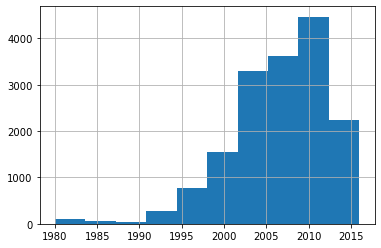

In [12]:
data['year_of_release'].hist() 
plt.show() 

Больше всего игр выпустили в 2008-2009. 


Теперь посмотрим, как менялись продажи по платформам, для этого выберем платформы с наибольшими суммарными продажами.

In [13]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: sum_sales, dtype: float64

Самыми успешными оказались: PS2, X360, PS3, Wii и DS.

Построим распределение выхода игр по годам для каждой платформы.

In [14]:
ps2 =  data[data['platform'] == 'PS2'] #создаем отдельные датафреймы для платформ
x360 = data[data['platform'] == 'X360']
ps3 = data[data['platform'] == 'PS3']
wii = data[data['platform'] == 'Wii']
ds = data[data['platform'] == 'DS']

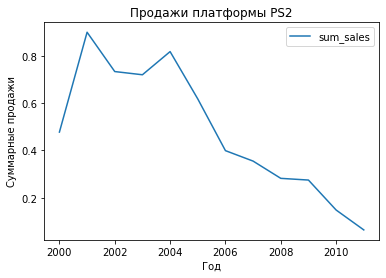

In [15]:
ps2.pivot_table(index='year_of_release', values='sum_sales').plot() #распределение по годам для PS2
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи платформы PS2')
plt.show()

Пик продаж - 2001 год, 'жизнь' платформы - 11 лет.

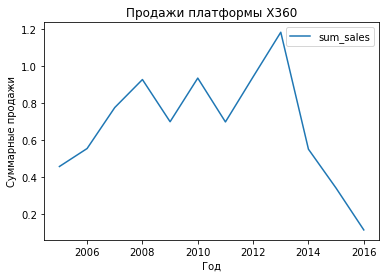

In [16]:
x360.pivot_table(index='year_of_release', values='sum_sales').plot() #распределение по годам для X360
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи платформы X360')
plt.show()

Пик продаж - 2013 год, 'жизнь' платформы - 11 лет.

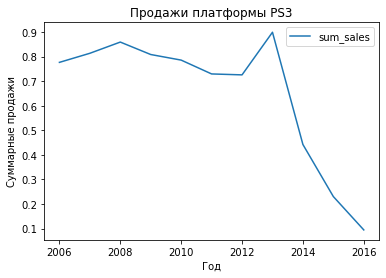

In [17]:
ps3.pivot_table(index='year_of_release', values='sum_sales').plot() #распределение по годам для PS3
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи платформы PS3')
plt.show()

Пик продаж - 2013 год, 'жизнь' платформы - 10 лет.

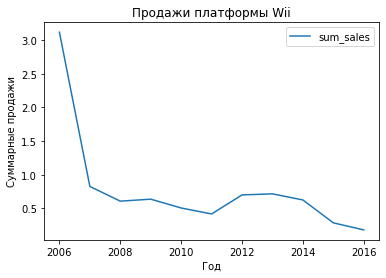

In [18]:
wii.pivot_table(index='year_of_release', values='sum_sales').plot() #распределение по годам для Wii
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи платформы Wii')
plt.show()

Пик продаж - 2006 год, 'жизнь' платформы - 10 лет.

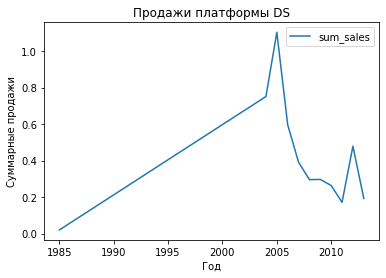

In [19]:
ds.pivot_table(index='year_of_release', values='sum_sales').plot() #распределение по годам для DS
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи платформы DS')
plt.show()

Пик продаж - 2005 год, 'жизнь' платформы - 28 лет.

Если обобщить данные, то, в среднем, жизненный цикл платформы - 11 лет.

Для построения прогноза на 2017 год нужно выбрать акутальный период. Возьмем с 2014 по 2016, так как компьютерная индустрия динамично меняющаяся и взяв более ранние года есть опастность захватить отжившие себя тренды. Отобранные данные сохраним в `actual_data`.

In [20]:
actual_data = data.loc[data['year_of_release'] >= 2014]
actual_data                    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,0,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,0,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


Теперь можем определить потенциально прибыльные на следующий год платформы:

<AxesSubplot:xlabel='year_of_release'>

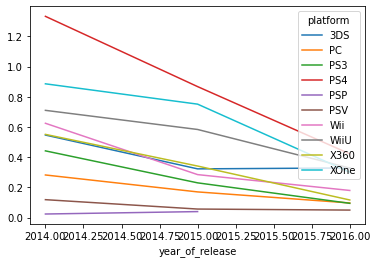

In [21]:
pd.pivot_table(actual_data, index='year_of_release', values='sum_sales', columns='platform').plot()

Платформы, которые не закрылись и у которых не упали в несколько раз продажи: 3DS, PSV, PC. Для них и проведем анализ. Для начала построим боксплоты продаж.

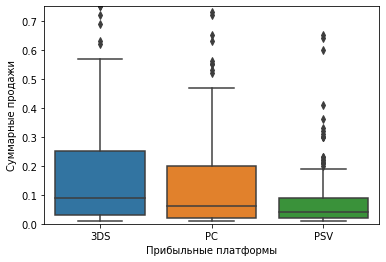

In [22]:
actual_platform = actual_data.loc[(actual_data['platform'] == '3DS') | (actual_data['platform'] == 'PSV') | (actual_data['platform'] == 'PC')]
sns.boxplot(x='platform', y='sum_sales', data=actual_platform)
plt.xlabel('Прибыльные платформы')
plt.ylabel('Суммарные продажи')
plt.ylim(0, 0.75)
plt.show()

Медиана продаж у платформ 3DS, PC и PSV равна сооветственно 0.098, 0.05 и 0.03, межквартильные размахи - 0.25, 0,2 и 0.8.

Теперь рассмотрим, как влияют на продажи внутри одной популярной платформы (PS2) отзывы пользователей и критиков. Для этого построим диаграмму рассеяния

Для потенциально прибыльных платформ рассмотрим влияние оценок пользователей на продажи, исключив из датасета нули, которыми заполняли пропуски.

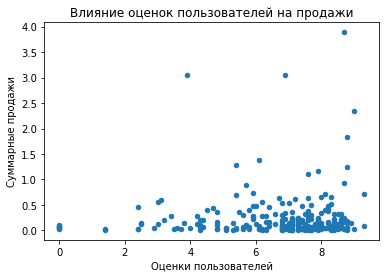

In [23]:
actual_platform = actual_platform.loc[(actual_data['user_score'] != 0) | (actual_data['critic_score'] != 0)]
actual_platform.plot(x='user_score', y='sum_sales', kind='scatter', c='#1f77b4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
plt.title('Влияние оценок пользователей на продажи')
plt.show()

Далее посчитаем корреляцию.

In [24]:
actual_platform['user_score'].corr(actual_platform['sum_sales'])

0.0688347207401111

Коэффициент корреляции Пирсона положительный и ненулевой
Оценки пользователей и суммарные продажи связаны линейно. Зачастую, чем выше оценка, тем выше суммарные продажи. 

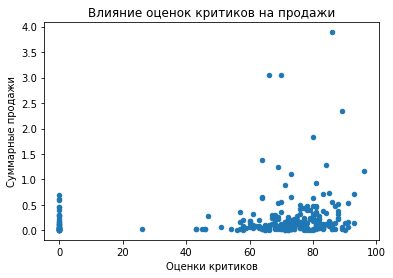

In [25]:
actual_platform.plot(x='critic_score', y='sum_sales', kind='scatter', c='#1f77b4')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
plt.title('Влияние оценок критиков на продажи')
plt.show()

Посчитаем корреляцию.

In [26]:
actual_platform['critic_score'].corr(actual_platform['sum_sales'])

0.11853180173562909

Коэффициент корреляции Пирсона положительный и ненулевой.
Оценки пользователей и суммарные продажи связаны линейно. Зачастую, чем выше оценка, тем выше суммарные продажи. 

Посмотрим на общее распределение игр по жанрам, посчитав медиану.

In [27]:
actual_data.groupby('genre')['sum_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

Самыми прибыльными жанрами являются Shooter, Sports и Platform. 

**Вывод**

На данномм этапе было проанализировано:
* количество игр в разные годы;
* продажи по платформам;
* лидирующие платформы;
* глобальные продажи в разбивке по платформам;
* влияние отзывов на продажи;
* взаимосвязь оценок критиков и пользователей;
* общее распределение по жнрам.

Перейдем к следующему шагу - составлению портрета пользователя каждого региона.


## Шаг 4. Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы.

<AxesSubplot:xlabel='platform', ylabel='sales'>

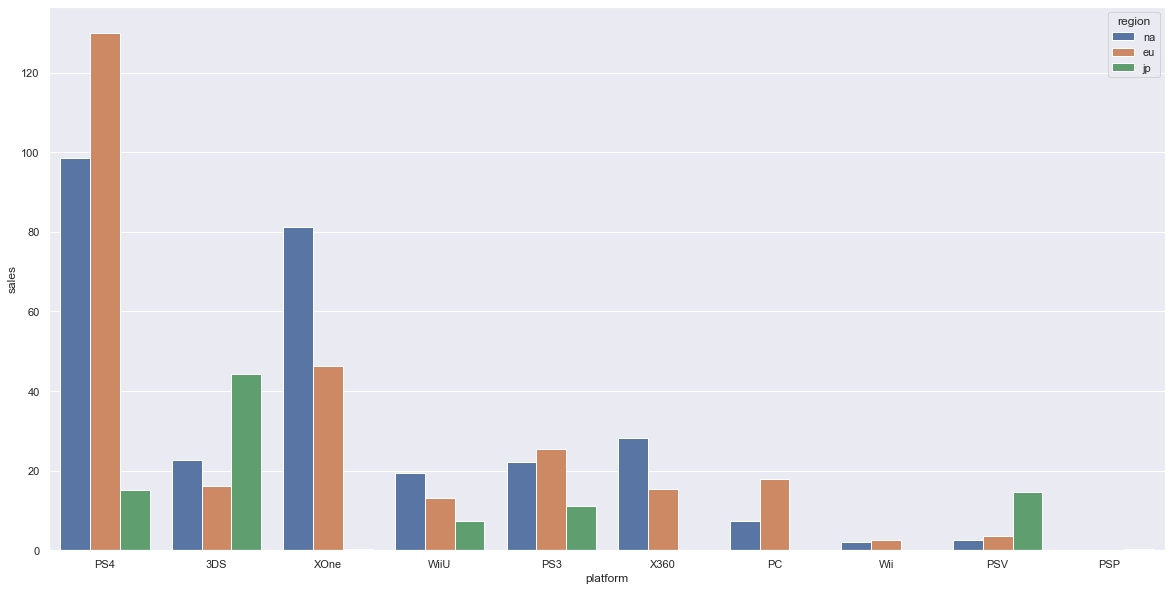

In [28]:
actual_data[['platform', 'na_sales', 'eu_sales', 'jp_sales']]
na = actual_data[['platform', 'na_sales']].rename(columns={'na_sales': 'sales'})
na['region'] = 'na'
eu = actual_data[['platform', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
eu['region'] = 'eu'
jp = actual_data[['platform', 'jp_sales']].rename(columns={'jp_sales': 'sales'})
jp['region'] = 'jp'

plot_data = pd.concat([na, eu, jp])
sns.set(rc={'figure.figsize':(20, 10)})
sns.barplot(x="platform", y="sales", hue="region", data=plot_data, ci=None, estimator=np.sum)

Для Европы и Северной Америки самой популярной является платформа PS4, а для Японии - 3DS.
Теперь проанализируем популярные жанры для каждого региона.

<AxesSubplot:xlabel='genre', ylabel='sales'>

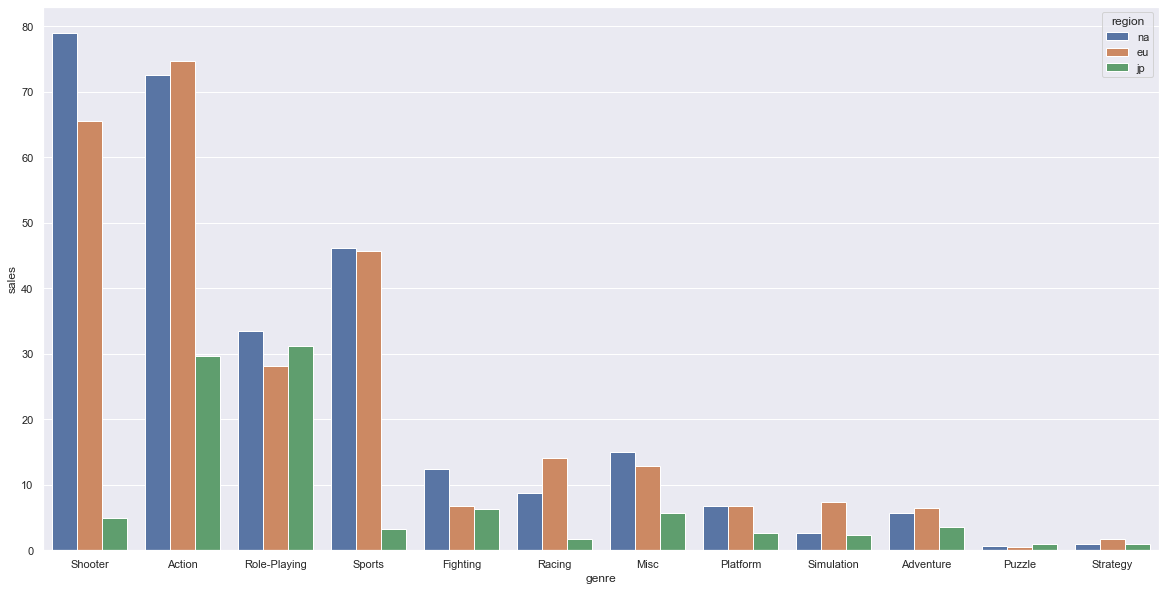

In [29]:
actual_data[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
na = actual_data[['genre', 'na_sales']].rename(columns={'na_sales': 'sales'})
na['region'] = 'na'
eu = actual_data[['genre', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
eu['region'] = 'eu'
jp = actual_data[['genre', 'jp_sales']].rename(columns={'jp_sales': 'sales'})
jp['region'] = 'jp'

plot_data = pd.concat([na, eu, jp])
sns.set(rc={'figure.figsize':(20, 10)})
sns.barplot(x="genre", y="sales", hue="region", data=plot_data, ci=None, estimator=np.sum)

Для Европы самым популярным является жанр Action, для Северной Америки - Shooter, а для Японии - Role-Playing. Спрос на жанр Action у Европы и Америки можно объяснить схожестью популярных платформ и менталитетом.

Далее проверим, как влияет рейтинг ESRB на продажи в регионах.

<AxesSubplot:xlabel='rating', ylabel='sales'>

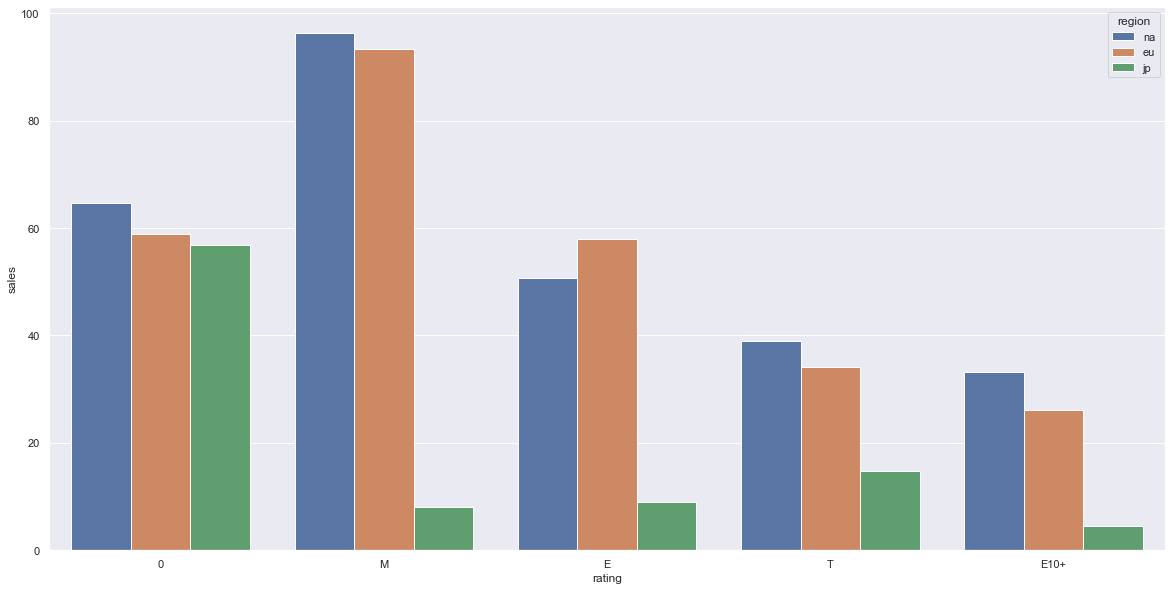

In [30]:
actual_data[['rating', 'na_sales', 'eu_sales', 'jp_sales']]
na = actual_data[['rating', 'na_sales']].rename(columns={'na_sales': 'sales'})
na['region'] = 'na'
eu = actual_data[['rating', 'eu_sales']].rename(columns={'eu_sales': 'sales'})
eu['region'] = 'eu'
jp = actual_data[['rating', 'jp_sales']].rename(columns={'jp_sales': 'sales'})
jp['region'] = 'jp'

plot_data = pd.concat([na, eu, jp])
sns.set(rc={'figure.figsize':(20, 10)})
sns.barplot(x="rating", y="sales", hue="region", data=plot_data, ci=None, estimator=np.sum)

Для Европы и Америки видется схожесть в рейтингах. Самыми популярными по продажам являются игры с рейтингом 'М' - 'От 17 лет'. Для Японии это же игры с неизвестным рейтингом.

**Вывод**

Для пользователей стран Северной Америки и Европы замечена схожесть в интересах - это и жанры и платформы. У жиителей Японии инетересы в играх совсем расхоятся с предыдущими. 

## Шаг 5. Проверка гипотез

**Гипотеза 1.** Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Сформулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей применим метод `st.ttest_ind`. Критический уровень статистической значимости зададим равный 0.05. Также исключаем строки с нулями, которыми заполняли пропуски.

In [31]:
xone = actual_data.loc[actual_data['platform'] == 'XOne']
pc = actual_data.loc[actual_data['platform'] == 'PC']


alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], 
    equal_var = False,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.31981092459798116
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевуая гипотеза верна. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза 2.** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые разные.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей применим метод `st.ttest_ind`. Критический уровень статистической значимости зададим равный 0.05. Также исключаем строки с нулями, которыми заполняли пропуски.

In [32]:
action_rating = actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'] != 0) & (actual_data['critic_score'] != 0)]
sports_rating = actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] != 0) & (actual_data['critic_score'] != 0)]
 
alpha=0.05
results = st.ttest_ind(
    action_rating['user_score'],
    sports_rating['user_score'],
    equal_var = False, nan_policy='omit')

print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  8.327612976032047e-09
Отвергаем нулевую гипотезу


**Вывод**

Нулевуая гипотеза не верна. Следовательно, средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В данной работе был проведен анализ игровых платформ, с помощью котрого можно выявить определяющие успешность игры закономерности. 

В самом начале данные были подготовлены к анализу: замена названия столбцов, преобразование данныз в нужные типы, обработка пропусков, сделан столбец с суммарными продажами регионов. 

Далее проведен исследовательский анализ данных. Выяснено, что больше всего игр выпустили в 2008-2009, а самыми успешными платформами оказались: PS2, X360, PS3, Wii и DS. Проанализиров данные платформы было выяснено, что в среднем "жизненный цикл" платформы составляет 11 лет. 
Для построения прогноза на 2017 год был выбран акутальный период - с 2014 по 2016, так как компьютерная индустрия динамично меняющаяся и взяв более ранние года есть опастность захватить отжившие себя тренды. Из акуального периода были выявлены потенциально прибыльные на следующий год платформы: 3DS, PSV, PC и жанры: Shooter, Sports и Platform. 

Следующим шагом были составлены портреты пользователя каждого региона. Для Европы и Северной Америки самой популярной является платформа PS4 и жанры Action и Shooter, а для Японии платформа 3DS и жанр Role-Playing. 
Для Европы и Америки видется схожесть в рейтингах. Самыми популярными по продажам являются игры с рейтингом 'М' - 'От 17 лет'. Для Японии это же игры с неизвестным рейтингом.

Далее был выдвинуты и доказаны гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковы и средние пользовательские рейтинги жанров Action и Sports разные.

Данные выводы позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.